In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cars_data.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,NaN,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,NaN,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,NaN,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,NaN,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US


In [4]:
new_cols = ['test', 'Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

df.columns = new_cols

In [5]:
df.head()

,test,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,NaN,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,NaN,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,NaN,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,NaN,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,NaN,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US


In [6]:
del df['test']
df = df.drop(index= 0)
df = df.drop(index= 1)

In [7]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US
5,AMC Rebel SST,16.0,8,304.0,150.0,3433,12.0,70,US
6,Ford Torino,17.0,8,302.0,140.0,3449,10.5,70,US


# What European Cars are the Heaviest Weight?

In [8]:
df.dtypes
df.Origin = df.Origin.astype('string')
df.Horsepower = df.Horsepower.astype('float')

In [9]:
df.dtypes

Car              object
MPG              object
Cylinders        object
Displacement     object
Horsepower      float64
Weight           object
Acceleration     object
Model            object
Origin           string
dtype: object

In [10]:
euro = df.drop(index=df[df['Origin'] != 'Europe'].index)

In [11]:
euro.tail()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
368,Peugeot 505s Turbo Diesel,28.1,4,141.0,80.0,3230,20.4,81,Europe
369,Saab 900s,0,4,121.0,110.0,2800,15.4,81,Europe
370,Volvo Diesel,30.7,6,145.0,76.0,3160,19.6,81,Europe
385,Volkswagen Rabbit l,36.0,4,105.0,74.0,1980,15.3,82,Europe
404,Volkswagen Pickup,44.0,4,97.00,52.0,2130,24.6,82,Europe


In [12]:
df.Horsepower = df.Horsepower.astype('float')

In [13]:
df.dtypes

Car              object
MPG              object
Cylinders        object
Displacement     object
Horsepower      float64
Weight           object
Acceleration     object
Model            object
Origin           string
dtype: object

In [14]:
euro = euro.sort_values(by ='Weight', ascending = True)

In [15]:
euro 

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
212,Volkswagen Rabbit,29.5,4,97.00,71.0,1825,12.2,76,Europe
227,Renault 5 GTL,36.0,4,79.00,58.0,1825,18.6,77,Europe
64,Volkswagen Model 111,27.0,4,97.00,60.0,1834,19.0,71,Europe
27,Volkswagen 1131 Deluxe Sedan,26.0,4,97.00,46.0,1835,20.5,70,Europe
339,Renault Lecar Deluxe,40.9,4,85.00,0.0,1835,17.3,80,Europe
...,...,...,...,...,...,...,...,...,...
337,Mercedes-Benz 240d,30.0,4,146.0,67.0,3250,21.8,80,Europe
218,Peugeot 504,19.0,4,120.0,88.0,3270,21.9,76,Europe
286,Peugeot 604sl,16.2,6,163.0,133.0,3410,15.8,78,Europe
306,Mercedes Benz 300d,25.4,5,183.0,77.0,3530,20.1,79,Europe


In [16]:
euro['Car'] = euro['Car'] + ' ' + euro['Model']

In [17]:
euro = euro.drop_duplicates(subset ="Car", keep = 'first') 


In [18]:
euro = euro.head(10)

In [19]:
euro.reset_index()

,index,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,212,Volkswagen Rabbit 76,29.5,4,97.00,71.0,1825,12.2,76,Europe
1,227,Renault 5 GTL 77,36.0,4,79.00,58.0,1825,18.6,77,Europe
2,64,Volkswagen Model 111 71,27.0,4,97.00,60.0,1834,19.0,71,Europe
3,27,Volkswagen 1131 Deluxe Sedan 70,26.0,4,97.00,46.0,1835,20.5,70,Europe
4,339,Renault Lecar Deluxe 80,40.9,4,85.00,0.0,1835,17.3,80,Europe
5,341,Volkswagen Rabbit 80,29.8,4,89.00,62.0,1845,15.3,80,Europe
6,126,Fiat 128 73,29.0,4,68.00,49.0,1867,19.5,73,Europe
7,302,Volkswagen Rabbit Custom 79,31.9,4,89.00,71.0,1925,14.0,79,Europe
8,184,Volkswagen Rabbit 75,29.0,4,90.00,70.0,1937,14.0,75,Europe
9,242,Volkswagen Rabbit Custom 77,29.0,4,97.00,78.0,1940,14.5,77,Europe


In [20]:
del euro['Model']

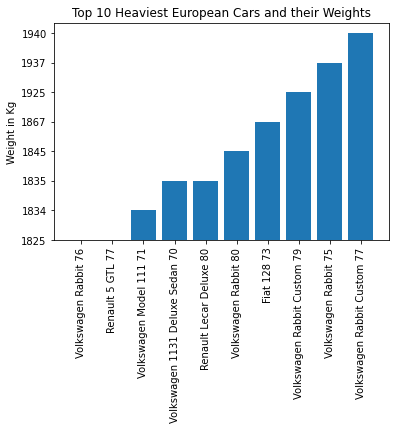

In [21]:
import matplotlib.pyplot as plt


#cars = [car for car, euro in euro.groupby('Car')]

plt.bar(euro['Car'], euro["Weight"])
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Heaviest European Cars and their Weights')
plt.ylabel('Weight in Kg')

plt.show()


### ^Above is the weights of the 10 heaviest European Cars from the Data

In [22]:
us = df.loc[df['Origin'] == 'US']

In [23]:
us

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US
5,AMC Rebel SST,16.0,8,304.0,150.0,3433,12.0,70,US
6,Ford Torino,17.0,8,302.0,140.0,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Chevrolet Camaro,27.0,4,151.0,90.0,2950,17.3,82,US
403,Ford Mustang GL,27.0,4,140.0,86.0,2790,15.6,82,US
405,Dodge Rampage,32.0,4,135.0,84.0,2295,11.6,82,US
406,Ford Ranger,28.0,4,120.0,79.0,2625,18.6,82,US


In [24]:
us = us.sort_values('Weight')


In [25]:
us = us.head(10)
us.reset_index()

,index,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,254,Ford Fiesta,36.1,4,98.00,66.0,1800,14.4,78,US
1,353,Plymouth Champ,39.0,4,86.00,64.0,1875,16.4,81,US
2,304,Dodge Colt Hatchback Custom,35.7,4,98.00,80.0,1915,14.4,79,US
3,65,Plymouth Cricket,26.0,4,91.00,70.0,1955,20.5,71,US
4,204,Chevrolet Chevette,29.0,4,85.00,52.0,2035,22.2,76,US
5,360,Ford Escort 4W,34.4,4,98.00,65.0,2045,16.2,81,US
6,40,Ford Pinto,25.0,4,98.00,0.0,2046,19.0,71,US
7,246,Chevrolet Chevette,30.5,4,98.00,63.0,2051,17.0,77,US
8,247,Dodge Colt m/m,33.5,4,98.00,83.0,2075,15.9,77,US
9,320,Chevrolet Chevette,32.1,4,98.00,70.0,2120,15.5,80,US


In [26]:
us['Car'] = us['Car'] + ' ' + us['Model']

In [27]:
us

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
254,Ford Fiesta 78,36.1,4,98.00,66.0,1800,14.4,78,US
353,Plymouth Champ 81,39.0,4,86.00,64.0,1875,16.4,81,US
304,Dodge Colt Hatchback Custom 79,35.7,4,98.00,80.0,1915,14.4,79,US
65,Plymouth Cricket 71,26.0,4,91.00,70.0,1955,20.5,71,US
204,Chevrolet Chevette 76,29.0,4,85.00,52.0,2035,22.2,76,US
360,Ford Escort 4W 81,34.4,4,98.00,65.0,2045,16.2,81,US
40,Ford Pinto 71,25.0,4,98.00,0.0,2046,19.0,71,US
246,Chevrolet Chevette 77,30.5,4,98.00,63.0,2051,17.0,77,US
247,Dodge Colt m/m 77,33.5,4,98.00,83.0,2075,15.9,77,US
320,Chevrolet Chevette 80,32.1,4,98.00,70.0,2120,15.5,80,US


In [28]:
del us['Model']

In [29]:
us.reset_index()

,index,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,254,Ford Fiesta 78,36.1,4,98.00,66.0,1800,14.4,US
1,353,Plymouth Champ 81,39.0,4,86.00,64.0,1875,16.4,US
2,304,Dodge Colt Hatchback Custom 79,35.7,4,98.00,80.0,1915,14.4,US
3,65,Plymouth Cricket 71,26.0,4,91.00,70.0,1955,20.5,US
4,204,Chevrolet Chevette 76,29.0,4,85.00,52.0,2035,22.2,US
5,360,Ford Escort 4W 81,34.4,4,98.00,65.0,2045,16.2,US
6,40,Ford Pinto 71,25.0,4,98.00,0.0,2046,19.0,US
7,246,Chevrolet Chevette 77,30.5,4,98.00,63.0,2051,17.0,US
8,247,Dodge Colt m/m 77,33.5,4,98.00,83.0,2075,15.9,US
9,320,Chevrolet Chevette 80,32.1,4,98.00,70.0,2120,15.5,US


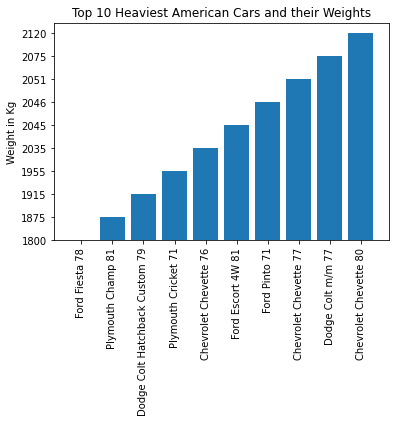

In [30]:
import matplotlib.pyplot as plt


#cars = [car for car, euro in euro.groupby('Car')]

plt.bar(us['Car'], us["Weight"])
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Heaviest American Cars and their Weights')
plt.ylabel('Weight in Kg')

plt.show()

### ^then we found the top 10 heaviest american cars from the data

In [31]:
japan = df.loc[df['Origin'] == 'Japan']

In [32]:
japan = japan.sort_values('Weight', ascending =True)

In [33]:
japan = japan.head(10)
japan['Car'] = japan['Car'] + ' ' + japan['Model']

In [34]:
del japan['Model']

In [35]:
japan.reset_index()

,index,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin
0,63,Datsun 1200 71,35.0,4,72.00,69.0,1613,18.0,Japan
1,153,Toyota Corolla 74,31.0,4,76.00,52.0,1649,16.5,Japan
2,352,Toyota Starlet 81,39.1,4,79.00,58.0,1755,16.9,Japan
3,354,Honda Civic 1300 81,35.1,4,81.00,60.0,1760,16.1,Japan
4,62,Toyota Corolla 1200 71,31.0,4,71.00,65.0,1773,19.0,Japan
5,207,Honda Civic 76,33.0,4,91.00,53.0,1795,17.4,Japan
6,190,Honda Civic CVCC 75,33.0,4,91.00,53.0,1795,17.5,Japan
7,257,Honda Civic CVCC 78,36.1,4,91.00,60.0,1800,16.4,Japan
8,140,Toyota Corolla 1200 74,32.0,4,71.00,65.0,1836,21.0,Japan
9,338,Honda Civic 1500 gl 80,44.6,4,91.00,67.0,1850,13.8,Japan


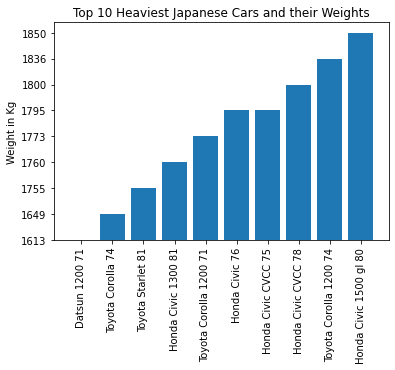

In [36]:
import matplotlib.pyplot as plt


#cars = [car for car, euro in euro.groupby('Car')]

plt.bar(japan['Car'], japan["Weight"])
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Heaviest Japanese Cars and their Weights')
plt.ylabel('Weight in Kg')

plt.show()

In [39]:
df.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US
5,AMC Rebel SST,16.0,8,304.0,150.0,3433,12.0,70,US
6,Ford Torino,17.0,8,302.0,140.0,3449,10.5,70,US
